In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


In [0]:
!git clone https://github.com/charis84/MadridAccidentsPrediction

In [0]:
data2018 = pd.read_csv('MadridAccidentsPrediction/Accidentalidad_Madrid_2018_ConvertedWeatherSurfaceValues.csv')

In [48]:
data2018.head()

,ID,EVENT_TYPE,DAY_OF_WEEK,RANGE_DATE_START,RANGE_DATE_END,DISTRICT,STREETS_1,STREETS_2,NO_OF_VICTIMS,CPFA_HAIL,CPFA_ICE,CPFA_RAIN,CPFA_FOG,CPFA_DRY,CPFA_SNOW,CPSV_WET,CPSV_OIL,CPSV_MUD,CPSV_LOOSE_GRAVEL,CPSV_ICE,CPSV_DRY_AND_CLEAN
0,2018-1,ATROPELLO,LUNES,1/01/2018 00:00,1/01/2018 00:59,Usera,CALLE DE SAN BASILIO,CALLE DEL CRISTO DE LA VICTORIA,1,NaN,NaN,NaN,NaN,DRY,NaN,NaN,NaN,NaN,NaN,NaN,DRY AND CLEAN
1,2018-3,CHOQUE CON OBJETO FIJO,LUNES,1/01/2018 01:00,1/01/2018 01:59,Hortaleza,AVENIDA DE FRANCISCO PI Y MARGALL,AVENIDA DE NICETO ALCALA ZAMORA,1,NaN,NaN,NaN,NaN,DRY,NaN,NaN,NaN,NaN,NaN,NaN,DRY AND CLEAN
2,2018-9,COLISION DOBLE,LUNES,1/01/2018 01:00,1/01/2018 01:59,San Blas,AVENIDA DE CANILLEJAS A VICALVARO,CALLE DE ALCALA,1,NaN,NaN,NaN,NaN,DRY,NaN,NaN,NaN,NaN,NaN,NaN,DRY AND CLEAN
3,2018-12,COLISION DOBLE,LUNES,1/01/2018 06:00,1/01/2018 06:59,Ciudad Lineal,CALLE DE ASCAO,CALLE DE LOS HERMANOS GARCIA NOBLEJAS,3,NaN,NaN,NaN,NaN,DRY,NaN,NaN,NaN,NaN,NaN,NaN,DRY AND CLEAN
4,2018-16,ATROPELLO,LUNES,1/01/2018 06:00,1/01/2018 06:59,Fuencarral-El Pardo,CALLE DEL CABO LOPEZ MARTINEZ NUM,NaN,2,NaN,NaN,NaN,NaN,DRY,NaN,NaN,NaN,NaN,NaN,NaN,DRY AND CLEAN


In [0]:
data2018.tail()

In [0]:
data2018.info()

## **Basic EDA**

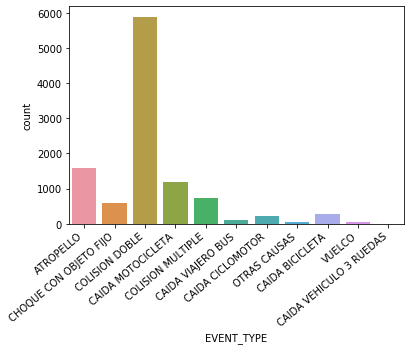

In [39]:
rplot = sns.countplot(data=data2018,x="EVENT_TYPE")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [0]:
rplot = sns.countplot(data=data2018,x="DAY_OF_WEEK")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [0]:
rplot = sns.countplot(data=data2018,x="DISTRICT")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

# **Which times of the day do accidents mostly happen?**

In [0]:
def RTAs_by_hour(data2018, hour):
  hour_list = []
  mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0

  for idx, row in data2018.iterrows():
    if pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "LUNES": mon +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "MARTES": tues +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "MIERCOLES": wed +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "JUEVES": thurs +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "VIERNES": fri +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "SABADO": sat +=1
    elif pd.to_datetime(row["RANGE_DATE_START"]).hour == hour and row["DAY_OF_WEEK"] == "DOMINGO": sun +=1
    else: a=0

  hour_list.append(mon)
  hour_list.append(tues)
  hour_list.append(wed)
  hour_list.append(thurs)
  hour_list.append(fri)
  hour_list.append(sat)
  hour_list.append(sun)

  total = mon+tues+wed+thurs+fri+sat+sun

  return hour_list

In [0]:
hour_0 = RTAs_by_hour(data2018, 0)
hour_1 = RTAs_by_hour(data2018, 1)
hour_2 = RTAs_by_hour(data2018, 2)
hour_3 = RTAs_by_hour(data2018, 3)
hour_4 = RTAs_by_hour(data2018, 4)
hour_5 = RTAs_by_hour(data2018, 5)
hour_6 = RTAs_by_hour(data2018, 6)
hour_7 = RTAs_by_hour(data2018, 7)
hour_8 = RTAs_by_hour(data2018, 8)
hour_9 = RTAs_by_hour(data2018, 9)
hour_10 = RTAs_by_hour(data2018, 10)
hour_11 = RTAs_by_hour(data2018, 11)
hour_12 = RTAs_by_hour(data2018, 12)
hour_13 = RTAs_by_hour(data2018, 13)
hour_14 = RTAs_by_hour(data2018, 14)
hour_15 = RTAs_by_hour(data2018, 15)
hour_16 = RTAs_by_hour(data2018, 16)
hour_17 = RTAs_by_hour(data2018, 17)
hour_18 = RTAs_by_hour(data2018, 18)
hour_19 = RTAs_by_hour(data2018, 19)
hour_20 = RTAs_by_hour(data2018, 20)
hour_21 = RTAs_by_hour(data2018, 21)
hour_22 = RTAs_by_hour(data2018, 22)
hour_23 = RTAs_by_hour(data2018, 23)
hour_24 = RTAs_by_hour(data2018, 24)

In [0]:
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", 
        "12pm", "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, 
                 hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, 
                 hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)


Display heatmap:

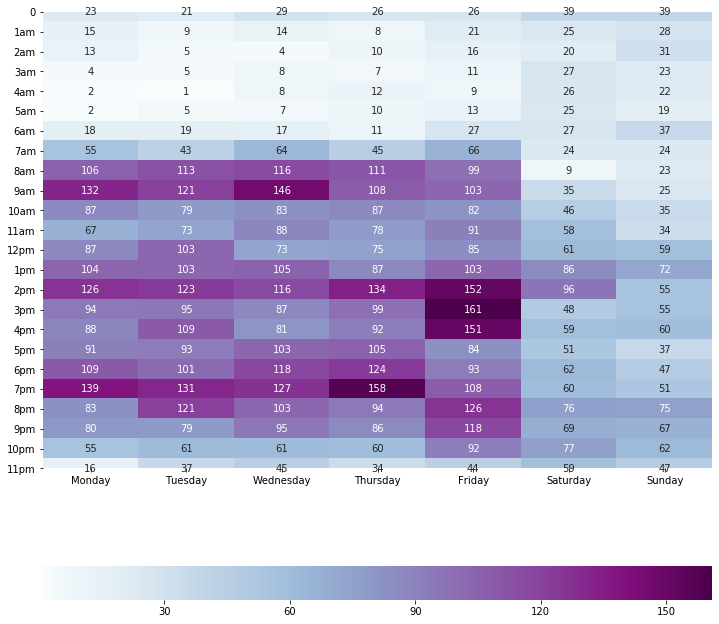

In [33]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title = "Traffic Accidents By Hour For Each Day in 2019"

# **In What Weather Conditions Do Accidents Mostly Happen?**

In [0]:
def RTAs_by_WeatherCondition(data2018, evntType):
  event_list = []
  hail, ice, rain, fog, dry, snow = 0,0,0,0,0,0

  for idx, row in data2018.iterrows():
    if (row["EVENT_TYPE"] == evntType):
       if row["CPFA_HAIL"] == "HAIL": hail +=1
       if row["CPFA_ICE"] == "ICE": ice +=1
       if row["CPFA_RAIN"] == "RAIN": rain +=1
       if row["CPFA_FOG"] == "FOG": fog +=1
       if row["CPFA_DRY"] == "DRY": dry +=1
       if row["CPFA_SNOW"] == "SNOW": snow +=1
    else: a=0

  event_list.append(hail)
  event_list.append(ice)
  event_list.append(rain)
  event_list.append(fog)
  event_list.append(dry)
  event_list.append(snow)

  total = hail+ice+rain+fog+dry+snow

  return event_list

In [0]:
event_1 = RTAs_by_WeatherCondition(data2018, "ATROPELLO")
event_2 = RTAs_by_WeatherCondition(data2018, "CHOQUE CON OBJETO FIJO")
event_3 = RTAs_by_WeatherCondition(data2018, "COLISION DOBLE")
event_4 = RTAs_by_WeatherCondition(data2018, "CAIDA MOTOCICLETA")
event_5 = RTAs_by_WeatherCondition(data2018, "COLISION MULTIPLE")
event_6 = RTAs_by_WeatherCondition(data2018, "CAIDA VIAJERO BUS")
event_7 = RTAs_by_WeatherCondition(data2018, "CAIDA CICLOMOTOR")
event_8 = RTAs_by_WeatherCondition(data2018, "OTRAS CAUSAS")
event_9 = RTAs_by_WeatherCondition(data2018, "CAIDA BICICLETA")
event_10 = RTAs_by_WeatherCondition(data2018, "VUELCO")
event_11 = RTAs_by_WeatherCondition(data2018, "CAIDA VEHICULO 3 RUEDAS")

In [0]:
columns = ["HAIL", "ICE", "RAIN", "FOG", "DRY", "SNOW"]
rows = ["ATROPELLO", "CHOQUE CON OBJETO FIJO", "COLISION DOBLE", "CAIDA MOTOCICLETA", "COLISION MULTIPLE", 
        "CAIDA VIAJERO BUS", "CAIDA CICLOMOTOR", "OTRAS CAUSAS", "CAIDA BICICLETA", "VUELCO", "CAIDA VEHICULO 3 RUEDAS"]
data = np.array([event_1, event_2, event_3, event_4, event_5, event_6, event_7, event_8, event_9, event_10, event_11])
heatmap_w_cond = pd.DataFrame(data=data, index=rows, columns=columns)


Display heatmap:

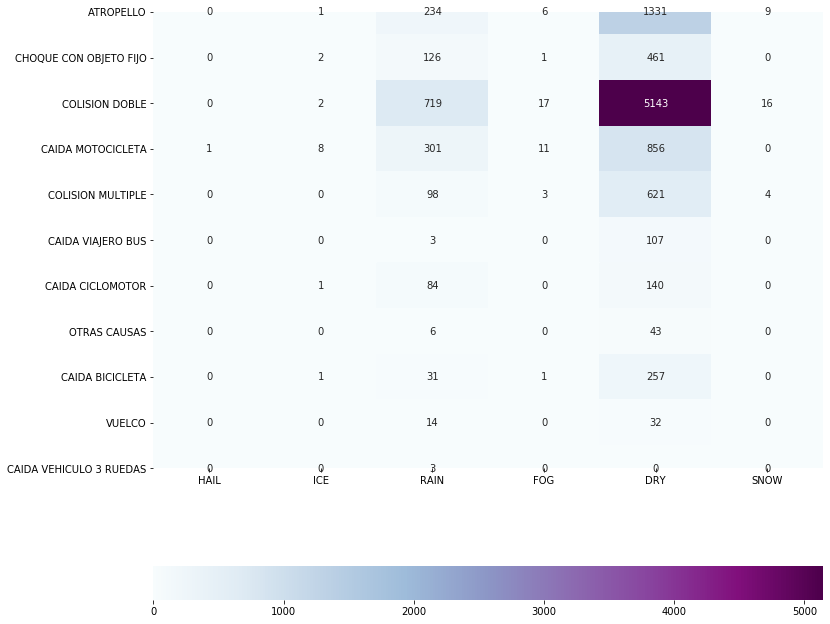

In [47]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_w_cond, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title = "Traffic Accidents By Weather Condition For Each Event Type in 2019"

# **In What Road Conditions Do Accidents Mostly Happen?**

In [0]:
def RTAs_by_RoadCondition(data2018, evntType):
  event_list = []
  wet, oil, mud, loose_gravel, ice, dry_and_clean = 0,0,0,0,0,0

  for idx, row in data2018.iterrows():
    if (row["EVENT_TYPE"] == evntType):
       if row["CPSV_WET"] == "WET": wet +=1
       if row["CPSV_OIL"] == "OIL": oil +=1
       if row["CPSV_MUD"] == "MUD": mud +=1
       if row["CPSV_LOOSE_GRAVEL"] == "LOOSE GRAVEL": loose_gravel +=1
       if row["CPSV_ICE"] == "ICE": ice +=1
       if row["CPSV_DRY_AND_CLEAN"] == "DRY AND CLEAN": dry_and_clean +=1
    else: a=0

  event_list.append(wet)
  event_list.append(oil)
  event_list.append(mud)
  event_list.append(loose_gravel)
  event_list.append(ice)
  event_list.append(dry_and_clean)

  total = wet+oil+mud+loose_gravel+ice+dry_and_clean

  return event_list

In [0]:
event_1 = RTAs_by_RoadCondition(data2018, "ATROPELLO")
event_2 = RTAs_by_RoadCondition(data2018, "CHOQUE CON OBJETO FIJO")
event_3 = RTAs_by_RoadCondition(data2018, "COLISION DOBLE")
event_4 = RTAs_by_RoadCondition(data2018, "CAIDA MOTOCICLETA")
event_5 = RTAs_by_RoadCondition(data2018, "COLISION MULTIPLE")
event_6 = RTAs_by_RoadCondition(data2018, "CAIDA VIAJERO BUS")
event_7 = RTAs_by_RoadCondition(data2018, "CAIDA CICLOMOTOR")
event_8 = RTAs_by_RoadCondition(data2018, "OTRAS CAUSAS")
event_9 = RTAs_by_RoadCondition(data2018, "CAIDA BICICLETA")
event_10 = RTAs_by_RoadCondition(data2018, "VUELCO")
event_11 = RTAs_by_RoadCondition(data2018, "CAIDA VEHICULO 3 RUEDAS")

In [0]:
columns = ["WET", "OIL", "MUD", "LOOSE GRAVEL", "ICE", "DRY AND CLEAN"]
rows = ["ATROPELLO", "CHOQUE CON OBJETO FIJO", "COLISION DOBLE", "CAIDA MOTOCICLETA", "COLISION MULTIPLE", 
        "CAIDA VIAJERO BUS", "CAIDA CICLOMOTOR", "OTRAS CAUSAS", "CAIDA BICICLETA", "VUELCO", "CAIDA VEHICULO 3 RUEDAS"]
data = np.array([event_1, event_2, event_3, event_4, event_5, event_6, event_7, event_8, event_9, event_10, event_11])
heatmap_r_cond = pd.DataFrame(data=data, index=rows, columns=columns)

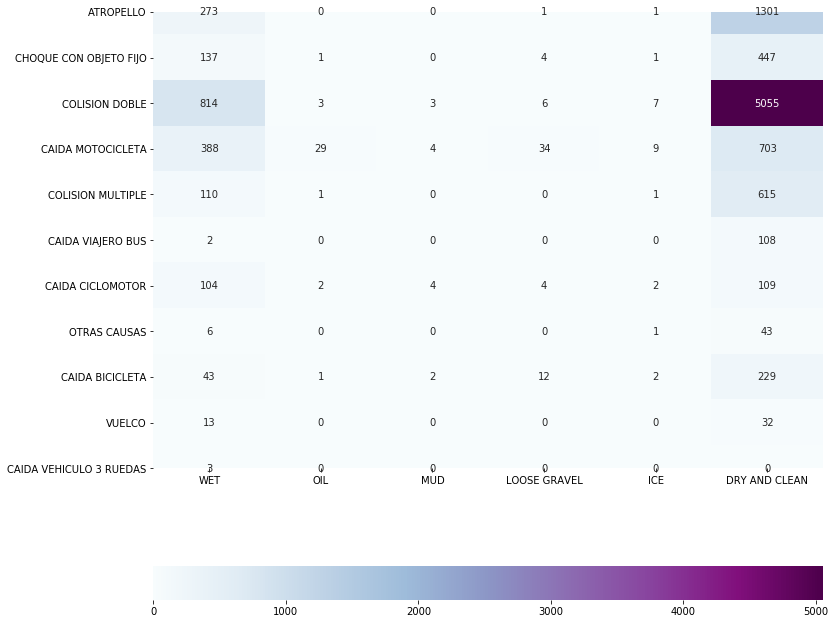

In [57]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_r_cond, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title = "Traffic Accidents By Road Condition For Each Event Type in 2019"

# **In What Times Of The Day Do Accidents Mostly Happen?**